## Lab-2 Experiment with filters and pools

Let's explore how convolutions work by creating a basic convolution on a 2D Grey Scale image. First we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines.

In [1]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

In E:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In E:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In E:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in M

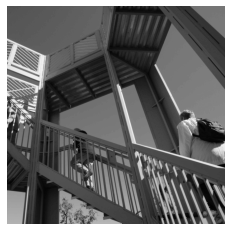

In [2]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [3]:
i_transform = np.copy(i) #The image is stored as a numpy array, so we can create the transformed image by just copying that array.
size_x = i_transform.shape[0]
size_y = i_transform.shape[1]

In [4]:
size_x

512

In [5]:
size_y

512

In [6]:
# Now we create 3x3 array filter.

filter = np.array([ [1., 2., 1.], [2., 4., 2.], [1., 2., 1.]]) * (1/16)

weight = 1

In [7]:
# Finally we'll load the new value into the transformed image.

# Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter.

for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        convolution = 0.0
        convolution = convolution + (i[x-1, y-1] * filter[0][0])
        convolution = convolution + (i[x-1, y] * filter[0][1])
        convolution = convolution + (i[x-1, y+1] * filter[0][2])
        convolution = convolution + (i[x, y-1] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x, y+1] * filter[1][2])
        convolution = convolution + (i[x+1, y-1] * filter[2][0])
        convolution = convolution + (i[x+1, y] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution * weight
        if(convolution<0):
            convolution = 0
        if(convolution>255):
            convolution = 255
        i_transform[x, y] = convolution    

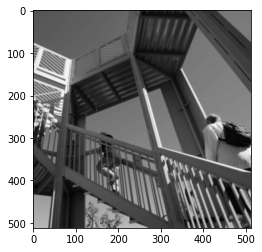

In [8]:
# Now we can plot the image to see the effect of the convolution!

plt.gray()
plt.grid(False)
plt.imshow(i_transform)
plt.show()

In [9]:
# This code will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y)) # Fills arrays with Zero Size
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(i_transform[x, y])
        pixels.append(i_transform[x+1, y])
        pixels.append(i_transform[x, y+1])
        pixels.append(i_transform[x+1, y+1])
        newImage[int(x/2),int(y/2)] = max(pixels)        

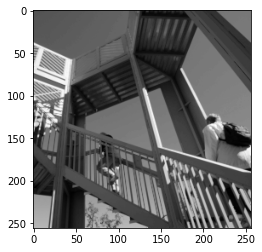

In [10]:
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()